In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Crime by Category x gender

In [2]:
CatGenderDt = pd.read_csv('CrimebyCategoryxgender.csv')

In [3]:
CatGenderDt.shape

(56, 7)

In [4]:
CatGenderDt.head()

,cat,gender,y_2012,y_2013,y_2014,y_2015,y_2016
0,A10,M,158.0,117,138.0,167.0,148.0
1,A20,M,19060.0,21646,21954.0,22469.0,25075.0
2,A30,M,2714.0,2899,3117.0,3148.0,3675.0
3,A40,M,238.0,219,242.0,250.0,293.0
4,A50,M,2030.0,1804,1472.0,1682.0,2068.0


In [5]:
CatGenderDt.columns= 'Category', 'Gender', '2012', '2013', '2014', '2015', '2016'

In [8]:
CatGenderDt[CatGenderDt.isnull().any(axis=1)]

,Category,Gender,2012,2013,2014,2015,2016
17,C90,M,NaN,5,NaN,NaN,0.0
41,B60,F,NaN,0,NaN,NaN,NaN
45,C90,F,NaN,0,NaN,NaN,6.0
49,D40,F,NaN,4,0.0,5.0,NaN
52,F10,F,NaN,0,0.0,0.0,0.0


In [8]:
# Mean of the 5 years per category
CatGenderDt['Mean'] = [(CatGenderDt.iloc[i])[['2012', '2013', '2014', '2015', '2016']].mean() for i in range(CatGenderDt.shape[0])]

In [9]:
catdf=pd.read_csv('Categories.csv', index_col='Category')
catdf

,Offence
Category,
A10,Homicide and related offences
A20,Assault and related offences
A30,Sexual offences
A40,Abduction and related offences
A50,Robbery
A60,Blackmail and extortion
A70,"Stalking, harassment and threatening behaviour"
A80,Dangerous and negligent acts endangering people
B10,Arson


### Gender x Crimes

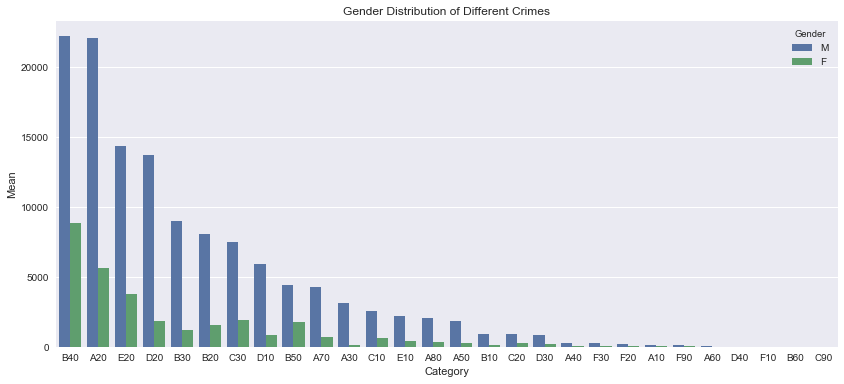

In [45]:
plt.figure (figsize=(14,6))
plt.title('Gender Distribution of Different Crimes')
sns.barplot(x='Category', y='Mean', data=CatGenderDt.sort_values(by= 'Mean', ascending=False), hue='Gender')
plt.ylabel('Mean')

### Crimes committed by males

In [13]:
#Mean sorted from high to low
malecrimes=CatGenderDt[CatGenderDt.Gender=='M'].sort_values(by= 'Mean', ascending=False)
malecrimes.index=malecrimes.Category
del malecrimes['Category']
malecrimes=malecrimes.join(catdf)
malecrimes

,Gender,2012,2013,2014,2015,2016,Mean,Offence
Category,,,,,,,,
B40,M,20499.0,21595,20086.0,21676.0,27069.0,22185.0,Theft
A20,M,19060.0,21646,21954.0,22469.0,25075.0,22040.8,Assault and related offences
E20,M,9037.0,11119,15836.0,16784.0,18891.0,14333.4,Breaches of orders
D20,M,16950.0,15726,13795.0,11631.0,10399.0,13700.2,Disorderly and offensive conduct
B30,M,8906.0,8429,8504.0,8516.0,10514.0,8973.8,Burglary/Break and enter
B20,M,7566.0,7912,7615.0,7957.0,9040.0,8018.0,Property damage
C30,M,6687.0,7260,7482.0,8002.0,7802.0,7446.6,Drug use and possession
D10,M,4700.0,5489,5699.0,6813.0,6935.0,5927.2,Weapons and explosives offences
B50,M,3708.0,4320,4302.0,4635.0,5207.0,4434.4,Deception


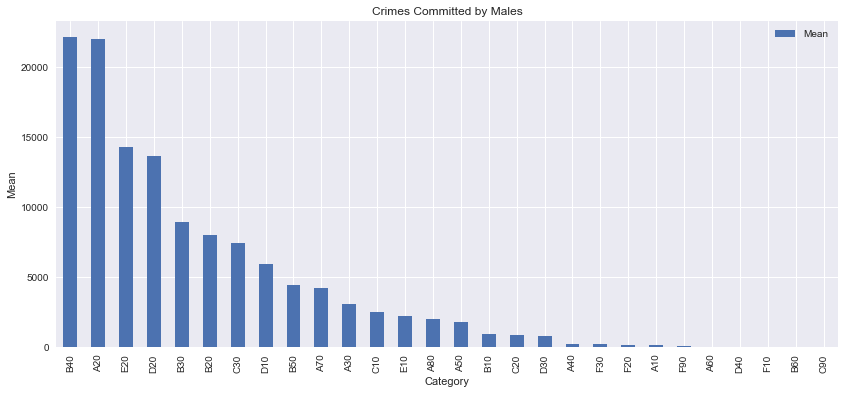

In [17]:
plt.figure (figsize=(14,6))
malecrimes[['Gender', 'Mean']].plot(kind='bar', figsize=(14,6))
plt.title('Crimes Committed by Males')
plt.ylabel('Mean')

In [28]:
malecrimes['Offence'][:11].reset_index()

,Category,Offence
0,B40,Theft
1,A20,Assault and related offences
2,E20,Breaches of orders
3,D20,Disorderly and offensive conduct
4,B30,Burglary/Break and enter
5,B20,Property damage
6,C30,Drug use and possession
7,D10,Weapons and explosives offences
8,B50,Deception
9,A70,"Stalking, harassment and threatening behaviour"


### Crimes committed by females

In [24]:
#unsorted
femalecrimes=CatGenderDt[CatGenderDt.Gender=='F']
femalecrimes.index=femalecrimes.Category
del femalecrimes['Category']
femalecrimes= femalecrimes.join(catdf)
femalecrimes

,Gender,2012,2013,2014,2015,2016,Mean,Offence
Category,,,,,,,,
A10,F,26.0,21,23.0,25.0,32.0,25.4,Homicide and related offences
A20,F,4885.0,5429,5650.0,5846.0,6467.0,5655.4,Assault and related offences
A30,F,99.0,122,110.0,116.0,162.0,121.8,Sexual offences
A40,F,37.0,33,40.0,33.0,32.0,35.0,Abduction and related offences
A50,F,307.0,249,208.0,183.0,228.0,235.0,Robbery
A60,F,10.0,15,12.0,10.0,6.0,10.6,Blackmail and extortion
A70,F,519.0,695,660.0,758.0,837.0,693.8,"Stalking, harassment and threatening behaviour"
A80,F,297.0,304,361.0,354.0,439.0,351.0,Dangerous and negligent acts endangering people
B10,F,81.0,158,177.0,168.0,175.0,151.8,Arson


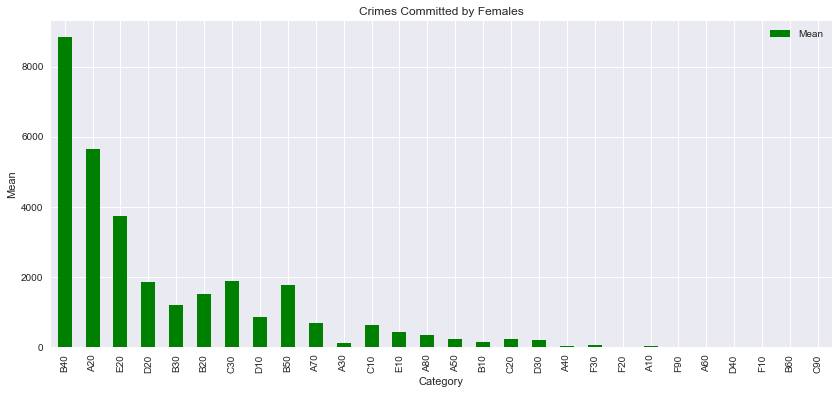

In [25]:
#order corresponding to sorted male crimes
plt.figure (figsize=(14,6))
femalecrimes.loc[list(malecrimes.index)][['Gender', 'Mean']].plot(kind='bar', figsize=(14,6), color='g')
plt.title('Crimes Committed by Females')
plt.ylabel('Mean')

In [22]:
#femalecrimes sorted from high to low
femalecrimes.sort_values(by='Mean', ascending=False)

,Gender,2012,2013,2014,2015,2016,Mean,Offence
Category,,,,,,,,
B40,F,8899.0,9528,7686.0,8392.0,9754.0,8851.8,Theft
A20,F,4885.0,5429,5650.0,5846.0,6467.0,5655.4,Assault and related offences
E20,F,2245.0,2791,4134.0,4428.0,5077.0,3735.0,Breaches of orders
C30,F,1370.0,1600,1871.0,2209.0,2380.0,1886.0,Drug use and possession
D20,F,2105.0,2085,1944.0,1657.0,1467.0,1851.6,Disorderly and offensive conduct
B50,F,1367.0,1652,1803.0,1919.0,2099.0,1768.0,Deception
B20,F,1304.0,1488,1447.0,1532.0,1893.0,1532.8,Property damage
B30,F,1007.0,1235,1091.0,1230.0,1471.0,1206.8,Burglary/Break and enter
D10,F,576.0,713,837.0,1001.0,1156.0,856.6,Weapons and explosives offences


### Gender x Year

To do?

### Year x Crime

To do?

## <font color=red>__- Theft, Assault/related offences and Breaches of orders are the top three crimes for both males and females. Sexual offences are at 11th place for males but further down for females__ </font>

# Crime by age x gender

In [88]:
AgeGenderCrime=pd.read_csv('Crimebyagexgender.csv', encoding='cp1252')
AgeGenderCrime.shape

(24, 7)

In [89]:
AgeGenderCrime.head()

,gender,AgeGroups,y_2012,y_2013,y_2014,y_2015,y_2016
0,M,10–14,2595.638902,2376.912011,2267.883174,2358.101608,2323.021828
1,M,15–19,11836.970260,11526.769310,11041.647460,10785.747560,11158.809960
2,M,20–24,10720.401060,10762.610250,10478.154220,9828.549377,11091.156770
3,M,25–29,7808.940970,8370.995734,8508.822491,8673.426816,9611.166840
4,M,30–34,7040.423626,7631.598858,7692.202099,8036.067073,8802.186815


In [90]:
AgeGenderCrime[AgeGenderCrime.isnull().any(axis=1)]

,gender,AgeGroups,y_2012,y_2013,y_2014,y_2015,y_2016


In [91]:
AgeGenderCrime['AgeGroups']=AgeGenderCrime['AgeGroups'].replace('65 years and over', '65+')
AgeGenderCrime.columns=['gender', 'AgeGroups', '2012', '2013', '2014', '2015', '2016']
# Mean of the 5 years per Agegroup
AgeGenderCrime['Mean']=[AgeGenderCrime[['2012', '2013', '2014', '2015', '2016']].iloc[i].mean() for i in range(AgeGenderCrime.shape[0])]

In [92]:
AgeGenderCrime.head()

,gender,AgeGroups,2012,2013,2014,2015,2016,Mean
0,M,10–14,2595.638902,2376.912011,2267.883174,2358.101608,2323.021828,2384.311505
1,M,15–19,11836.970260,11526.769310,11041.647460,10785.747560,11158.809960,11269.988910
2,M,20–24,10720.401060,10762.610250,10478.154220,9828.549377,11091.156770,10576.174335
3,M,25–29,7808.940970,8370.995734,8508.822491,8673.426816,9611.166840,8594.670570
4,M,30–34,7040.423626,7631.598858,7692.202099,8036.067073,8802.186815,7840.495694


### Gender x Age

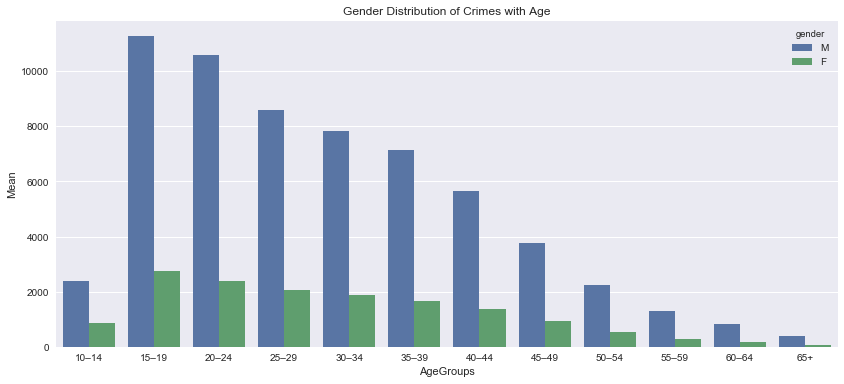

In [93]:
plt.figure (figsize=(14,6))
sns.barplot(x='AgeGroups', y='Mean', data=AgeGenderCrime, hue='gender')
plt.title('Gender Distribution of Crimes with Age')
plt.ylabel('Mean')

### Age x Yearly Crimes

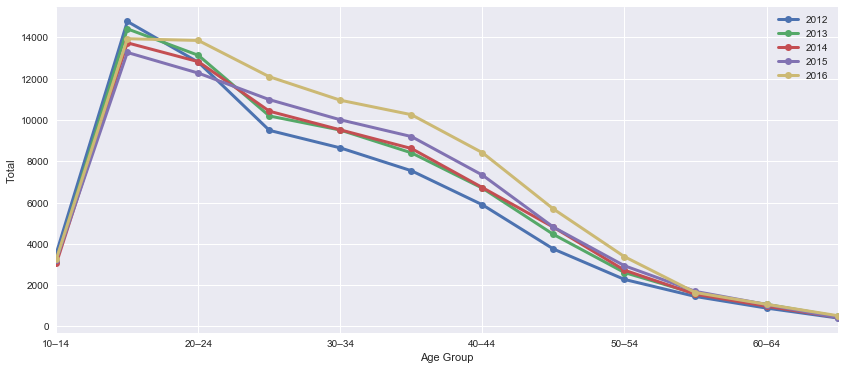

In [128]:
#combined female and male crime per agegroup
(AgeGenderCrime[['AgeGroups','2012', '2013', '2014', '2015', '2016']].groupby(by='AgeGroups').sum()).plot(kind='line', figsize=(14,6), linewidth=3, marker='o')
plt.xlabel('Age Group')
plt.ylabel('Total')

### Gender x Yearly Crimes

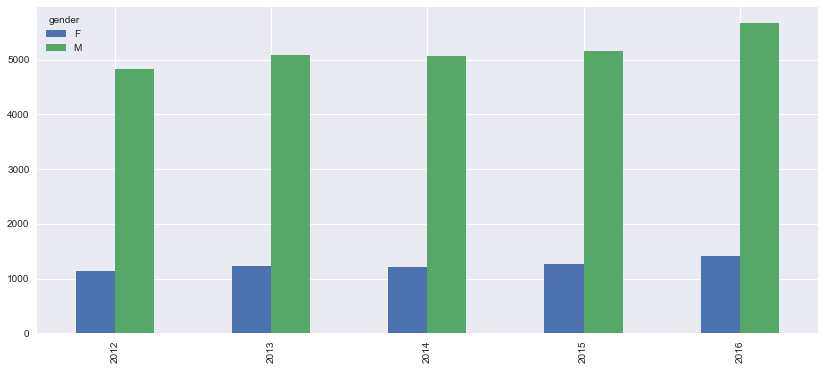

In [131]:
(AgeGenderCrime[['AgeGroups', 'gender', '2012', '2013', '2014', '2015', '2016']].groupby(by='gender').mean()).T.plot(kind='bar', figsize=(14,6))

## <font color=red> - __15-19 year old males and females are more likely to commit a crime. - 2016 saw an increase in crimes by both males and females__ </font>

# Sex Offenders

In [95]:
SexOffendrs=pd.read_csv('sexoffenders.csv')
SexOffendrs.shape

(24, 7)

In [96]:
SexOffendrs.head()

,gender,AgeGroup,y_2012,y_2013,y_2014,y_2015,y_2016
0,M,Oct-14,120.0,125.0,133.0,117.0,149.0
1,M,15-19,346.0,367.0,423.0,349.0,447.0
2,M,20-24,303.0,308.0,362.0,367.0,426.0
3,M,25-29,271.0,304.0,302.0,324.0,351.0
4,M,30-34,248.0,251.0,276.0,320.0,365.0


In [97]:
SexOffendrs[SexOffendrs.isnull().any(axis=1)]

,gender,AgeGroup,y_2012,y_2013,y_2014,y_2015,y_2016
20,F,50-54,NaN,6.0,11.0,6.0,9.0
22,F,60-64,NaN,NaN,NaN,NaN,NaN
23,F,65 years and over,NaN,7.0,NaN,5.0,5.0


In [98]:
SexOffendrs['AgeGroup']=SexOffendrs.AgeGroup.replace('Oct-14', '10-14')
SexOffendrs['AgeGroup']=SexOffendrs.AgeGroup.replace('65 years and over', '65+')
SexOffendrs.columns = ['gender', 'AgeGroup', '2012', '2013', '2014', '2015', '2016']
# mean offender for 5 year in each row
SexOffendrs['Mean']=[(SexOffendrs[['2012', '2013', '2014', '2015', '2016']].iloc[i].mean()) for i in range(SexOffendrs.shape[0])]

In [99]:
SexOffendrs.head()

,gender,AgeGroup,2012,2013,2014,2015,2016,Mean
0,M,10-14,120.0,125.0,133.0,117.0,149.0,128.8
1,M,15-19,346.0,367.0,423.0,349.0,447.0,386.4
2,M,20-24,303.0,308.0,362.0,367.0,426.0,353.2
3,M,25-29,271.0,304.0,302.0,324.0,351.0,310.4
4,M,30-34,248.0,251.0,276.0,320.0,365.0,292.0


### Age Group x Gender

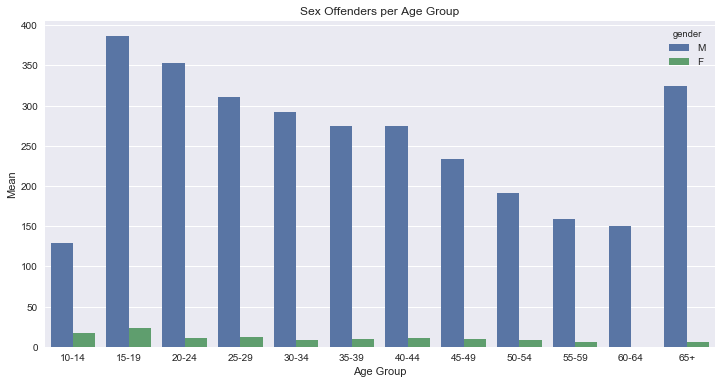

In [100]:
#Mean Sex Offenders per Age Group for F and M
plt.figure(figsize=(12,6))
sns.barplot(x = 'AgeGroup', y = "Mean", data = SexOffendrs, hue='gender')
plt.title('Sex Offenders per Age Group')
plt.ylabel('Mean')
plt.xlabel('Age Group')
plt.show()

*Data not complete for 50-54 and 60+ Females

### Year x Gender

In [103]:
#Mean Sex Offenders per Year for F and M
gendermeanperyear = SexOffendrs.groupby(by=['gender']).mean()
gendermeanperyearT=((gendermeanperyear.T)[:5])[['M','F']]
gendermeanperyearT

gender,M,F
2012,224.250000,10.333333
2013,239.416667,10.727273
2014,257.000000,10.600000
2015,259.583333,10.000000
2016,302.666667,14.454545


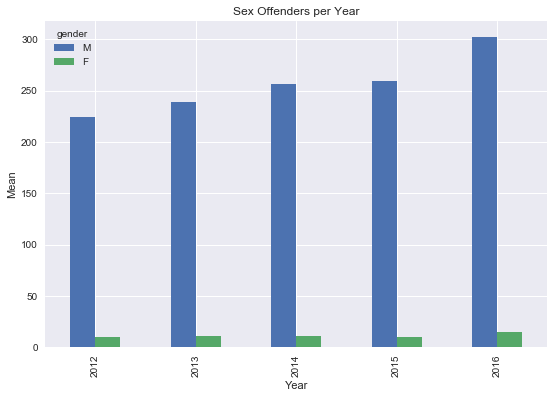

In [104]:
gendermeanperyearT.plot(kind='bar', figsize=(9,6))
plt.title('Sex Offenders per Year')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.legend(title='gender', loc='upper left')
plt.show()

### Age Group x Year

In [105]:
#Total Sex Offenders per Age Group
agegrp = SexOffendrs[['AgeGroup', '2012', '2013', '2014', '2015', '2016']].groupby(by='AgeGroup').sum()
agegrp

,2012,2013,2014,2015,2016
AgeGroup,,,,,
10-14,130.0,147.0,144.0,132.0,174.0
15-19,370.0,387.0,440.0,376.0,476.0
20-24,308.0,324.0,377.0,372.0,437.0
25-29,279.0,314.0,313.0,337.0,368.0
30-34,253.0,262.0,281.0,330.0,377.0
35-39,261.0,254.0,301.0,270.0,339.0
40-44,271.0,286.0,272.0,284.0,317.0
45-49,216.0,238.0,245.0,223.0,294.0
50-54,194.0,187.0,192.0,190.0,227.0


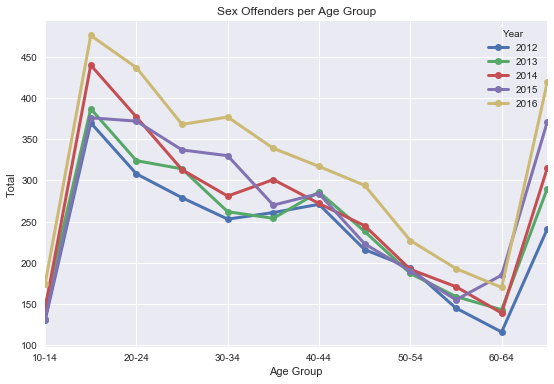

In [106]:
plt.figure('By age group')
agegrp.plot(y=['2012', '2013', '2014', '2015', '2016'] , kind='line', figsize=(9,6), linewidth=3, marker='o')
plt.title('Sex Offenders per Age Group')
plt.legend(title='Year', loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Total')


## <font color=red> - __15-19 year old males and females are more likely to be a sex offender (similar to crimes in general). But male are more likely to be sex offenders than female. 65+ males are more likely to be sex offenders than general criminals - 2016 saw an increase in crimes by both males and females for all age groups__ </font>

# Victims of sexual offence

In [114]:
dt=pd.read_excel('victimsofsexualoffence.xlsx')

In [115]:
dt.shape

(28, 7)

In [116]:
(dt['AgeGroup']).iloc[2]='10-14'
(dt['AgeGroup']).iloc[16]='10-14'
dt['AgeGroup']=dt.AgeGroup.replace('65 years and over', '65+')
dt['AgeGroup']=dt.AgeGroup.replace('0–4','00-04')
dt['AgeGroup']=dt.AgeGroup.replace('5–9','05-09')
dt.columns = ['gender', 'AgeGroup', '2012', '2013', '2014', '2015', '2016']
dt['Mean']=[dt[['2012', '2013', '2014', '2015', '2016']].iloc[i].mean() for i in range(dt.shape[0])]

C:\Users\VinTab\Desktop\programming\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [117]:
dt.head()

,gender,AgeGroup,2012,2013,2014,2015,2016,Mean
0,M,00-04,61,50,48,67,74,60.0
1,M,05-09,157,157,176,189,228,181.4
2,M,10-14,186,166,177,205,284,203.6
3,M,15-19,137,118,154,161,186,151.2
4,M,20-24,62,70,69,72,92,73.0


In [118]:
dt[dt.isnull().any(axis=1)]

,gender,AgeGroup,2012,2013,2014,2015,2016,Mean


### Age Group x Gender

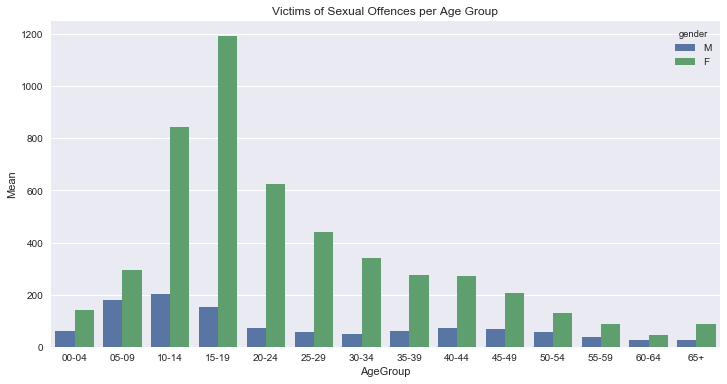

In [120]:
#Mean Victims of Sexual Offences per Age Group for F and M
plt.figure(figsize=(12,6))
plt.title('Victims of Sexual Offences per Age Group')
sns.barplot(x = 'AgeGroup', y = "Mean", data = dt, hue='gender')
plt.ylabel('Mean')
plt.show()

### Year x Gender

In [123]:
#Mean Victims of Sexual Offences per Year for F and M
gendermeanperyear = dt[['gender', '2012', '2013', '2014', '2015', '2016']].groupby(by=['gender']).mean()
gendermeanperyear.T

gender,F,M
2012,308.000000,64.000000
2013,330.357143,67.428571
2014,339.214286,78.142857
2015,364.857143,87.571429
2016,437.500000,103.214286


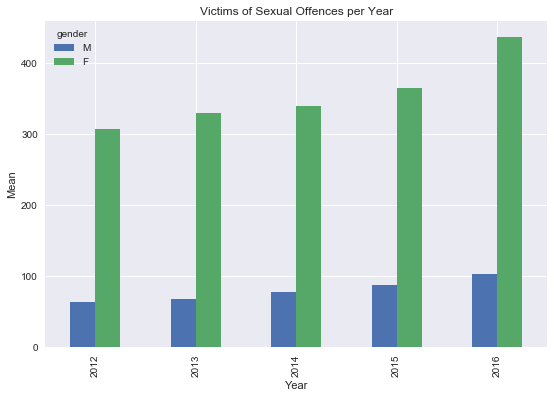

In [124]:
(gendermeanperyear.T)[['M', 'F']].plot(kind='bar', figsize=(9,6))
plt.title('Victims of Sexual Offences per Year')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.legend(title='gender')

### Age Group x Year

In [126]:
#Total Victims of Sexual Offences per Age Group
agegrp = dt[['AgeGroup', '2012', '2013', '2014', '2015', '2016']].groupby(by='AgeGroup').sum()
agegrp

,2012,2013,2014,2015,2016
AgeGroup,,,,,
00-04,196,204,177,198,233
05-09,412,450,465,505,555
10-14,947,936,947,1092,1310
15-19,1220,1217,1253,1345,1682
20-24,649,694,651,667,836
25-29,400,441,463,535,647
30-34,331,367,380,406,461
35-39,284,298,312,362,426
40-44,281,318,353,381,388


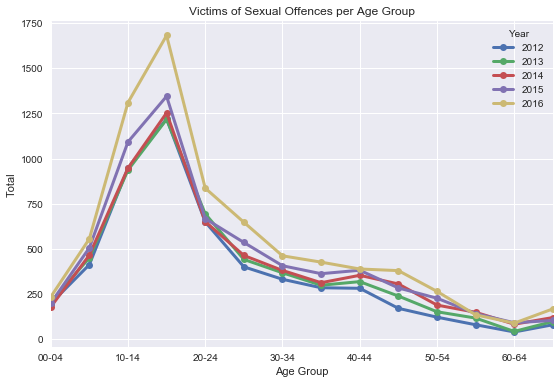

In [127]:
plt.figure('By age group')
agegrp.plot(y=['2012', '2013', '2014', '2015', '2016'], kind='line', figsize=(9,6) , linewidth=3, marker='o', fillstyle=None)
plt.title('Victims of Sexual Offences per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total')
plt.legend(title='Year')

## <font color=red> - __15-19 year old females and 10-14 old males are more likely to be victims of sex crimes.  - 2016 saw an increase in both males and females victims of sex crimes for all age groups. This is consistent with the increase in offenders. __ </font>